In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("kozhikado.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,PS,WS50M
0,2011,6,1,5,26.33,93.31,1.22,98.66,5.64
1,2011,6,1,6,26.56,92.81,1.15,98.72,6.04
2,2011,6,1,7,26.87,91.88,1.12,98.79,6.96
3,2011,6,1,8,27.13,90.69,1.05,98.88,8.18
4,2011,6,1,9,27.30,87.56,1.09,98.93,9.20
...,...,...,...,...,...,...,...,...,...
86203,2021,4,1,0,27.12,88.69,0.08,98.77,4.61
86204,2021,4,1,1,27.01,88.69,0.07,98.71,4.84
86205,2021,4,1,2,26.94,88.44,0.05,98.67,5.03
86206,2021,4,1,3,26.81,88.44,0.04,98.68,5.07


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
PS             0.0
WS50M          0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS50M']


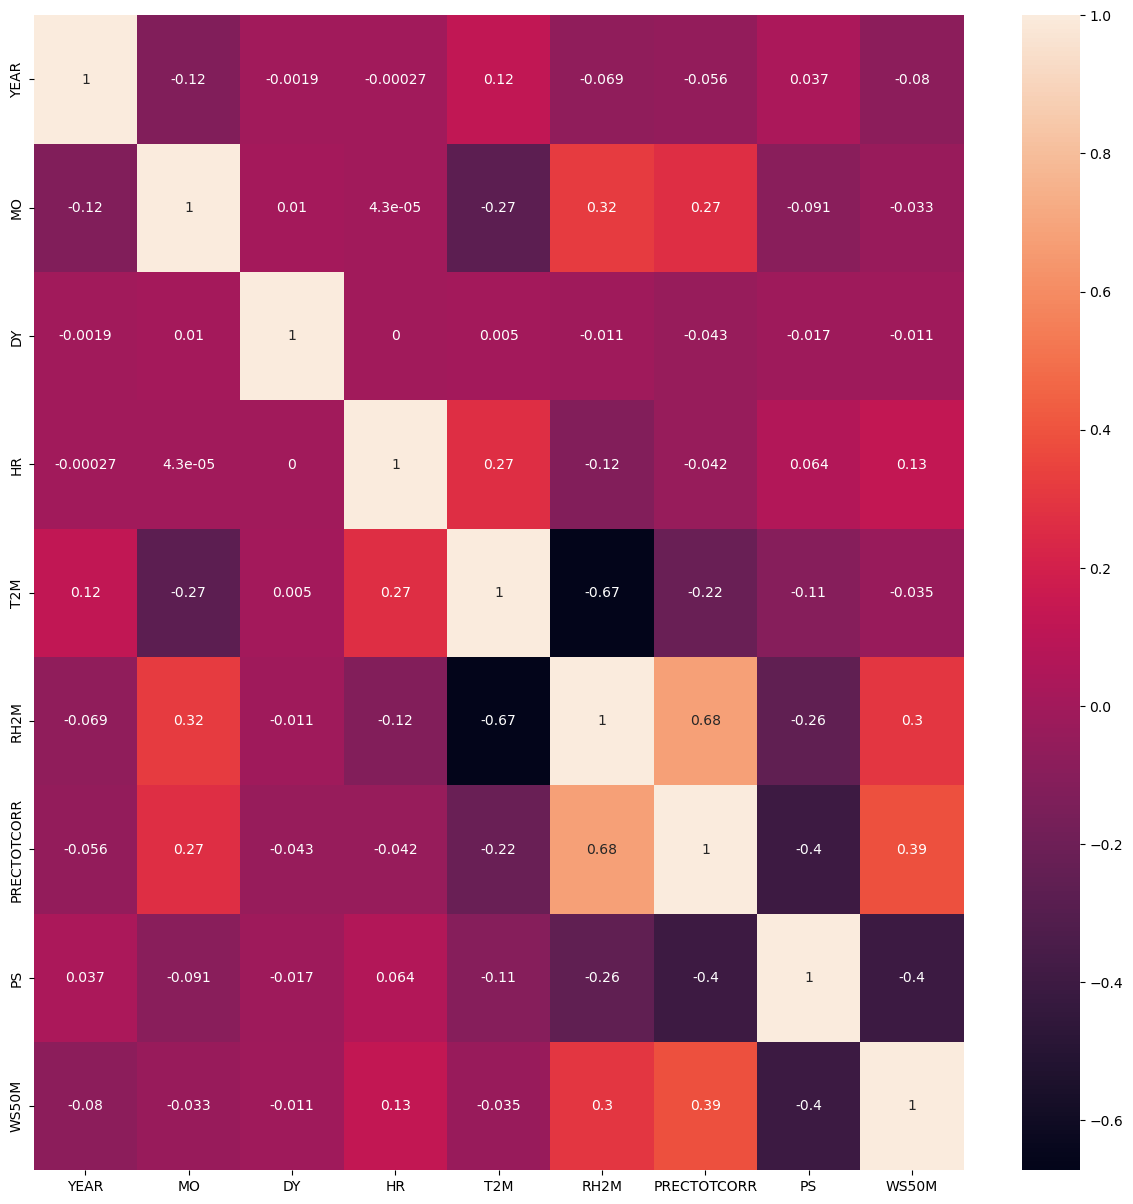

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

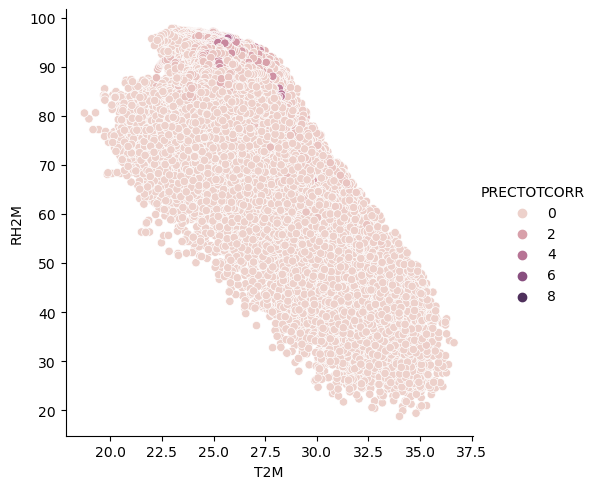

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


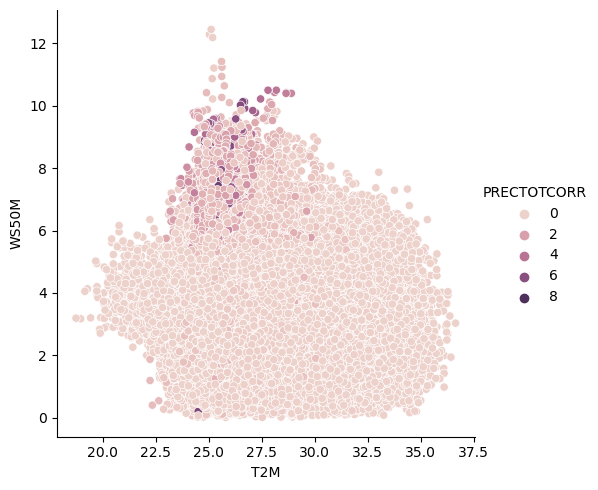

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


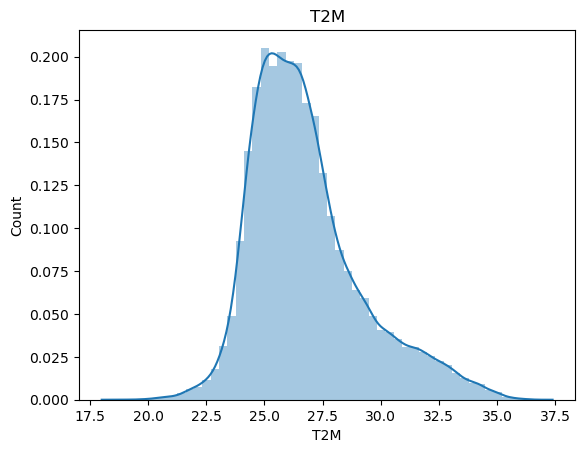

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


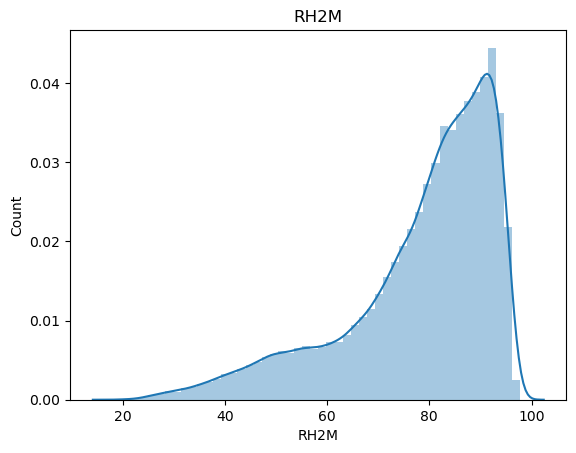

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


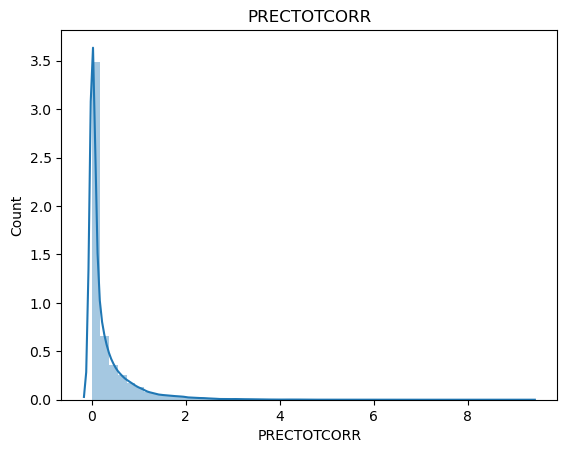

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


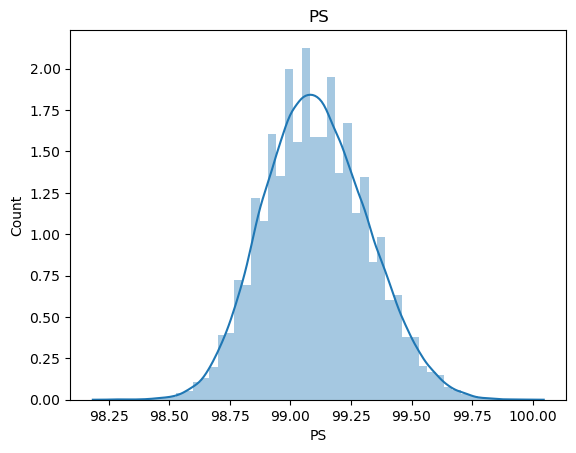

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


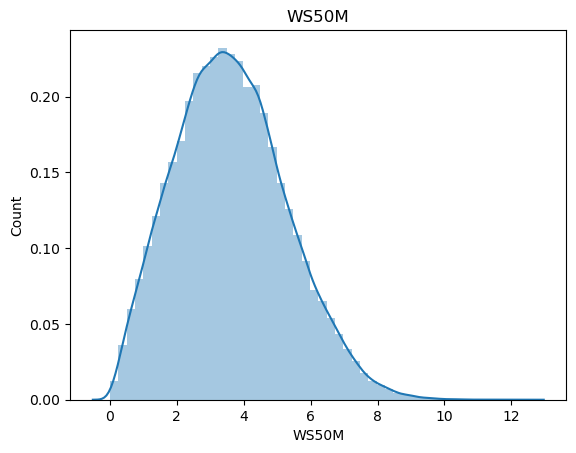

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

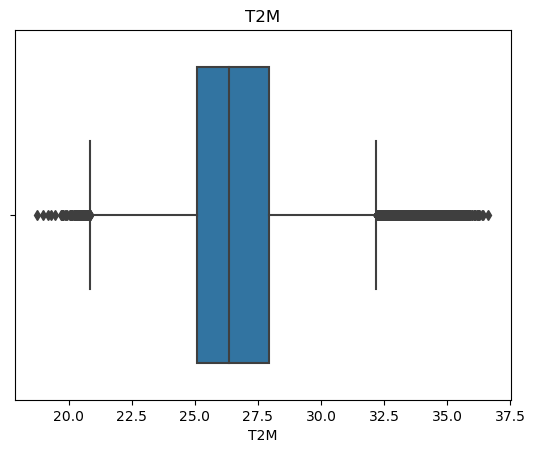

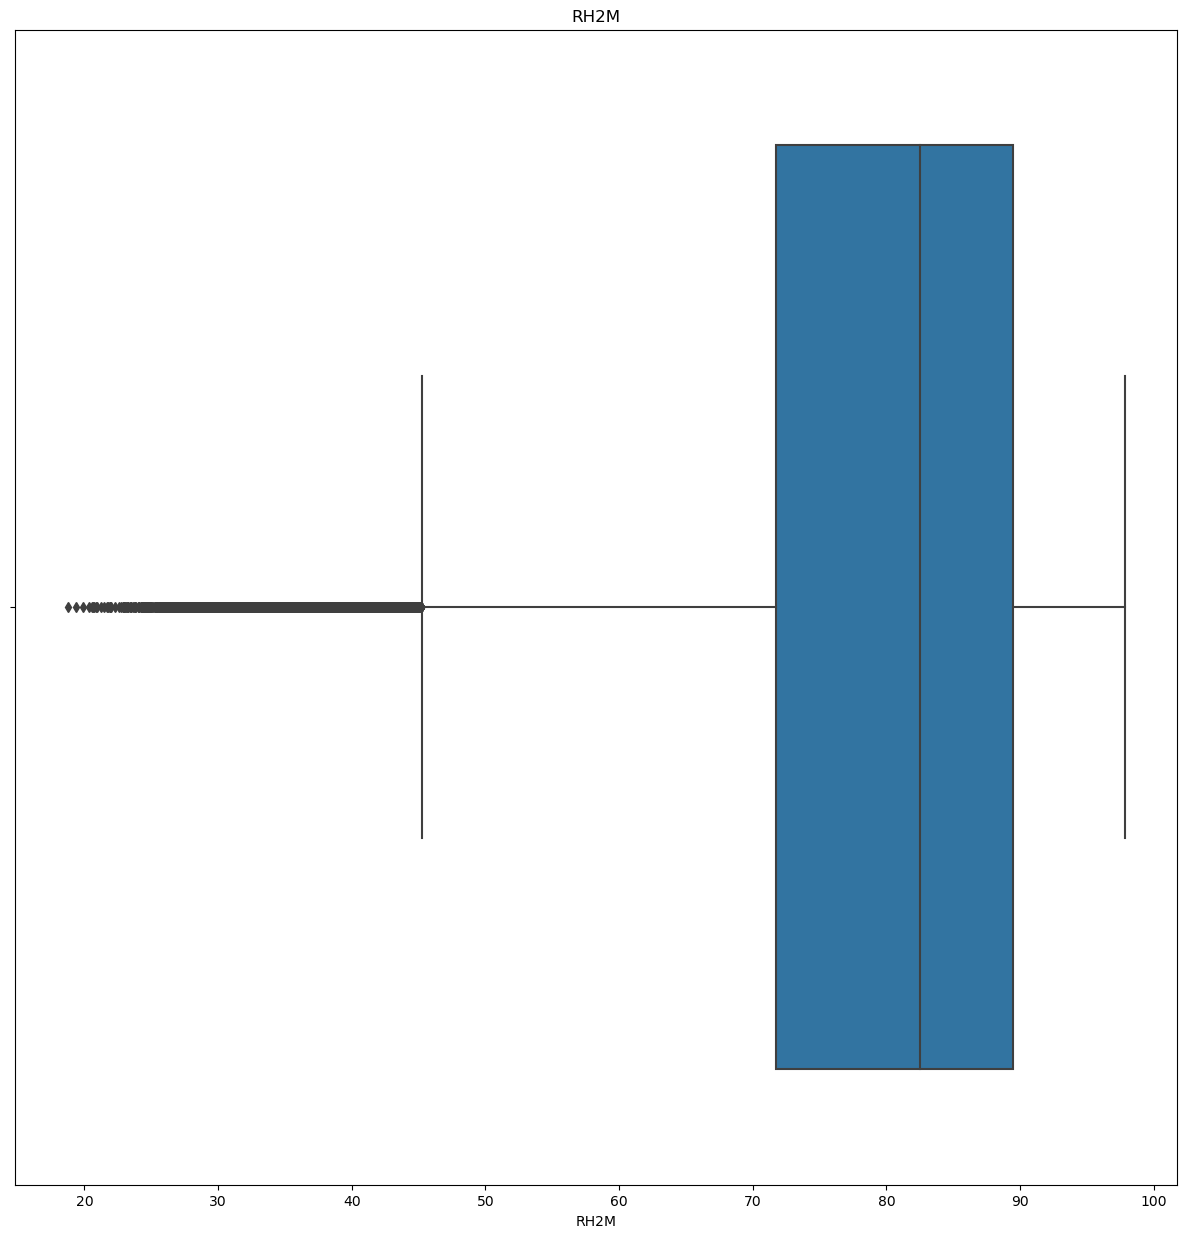

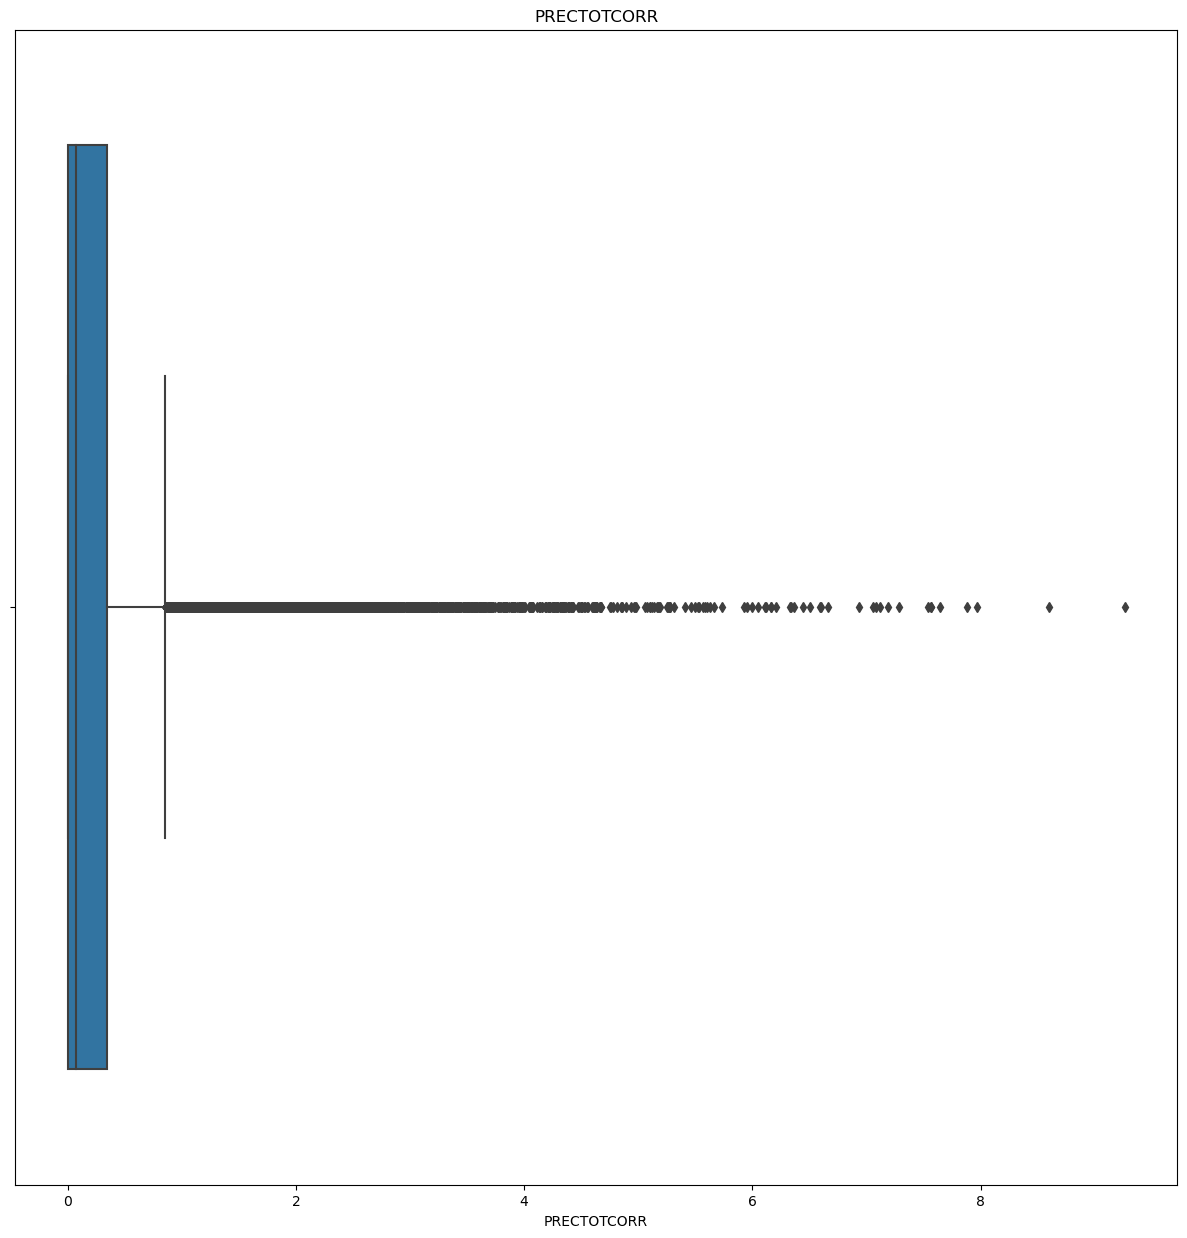

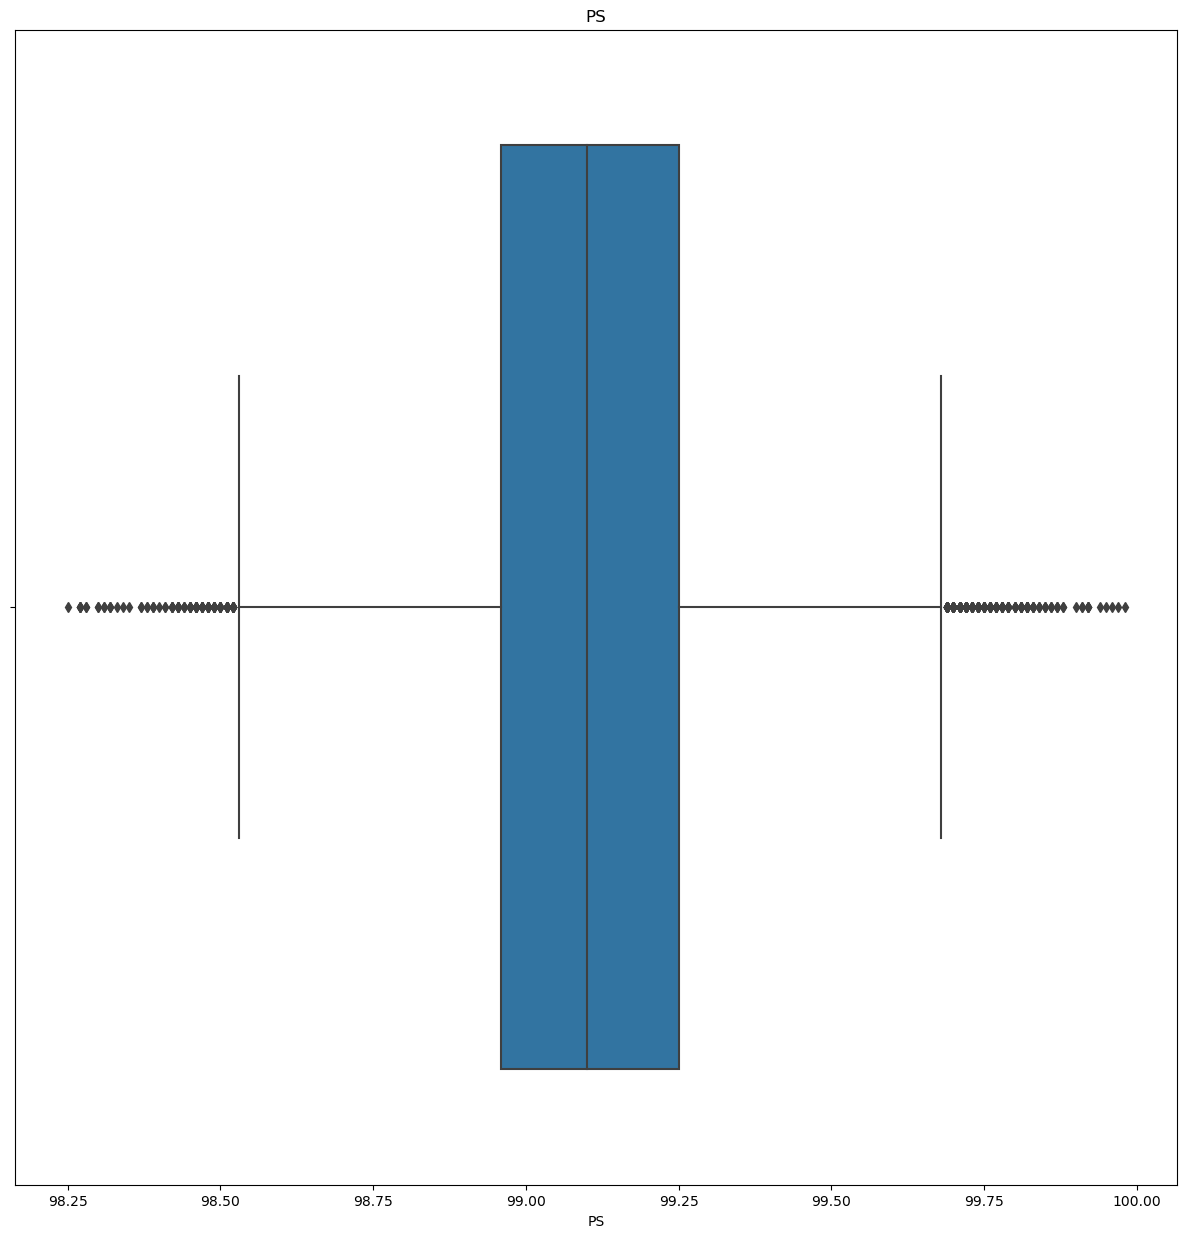

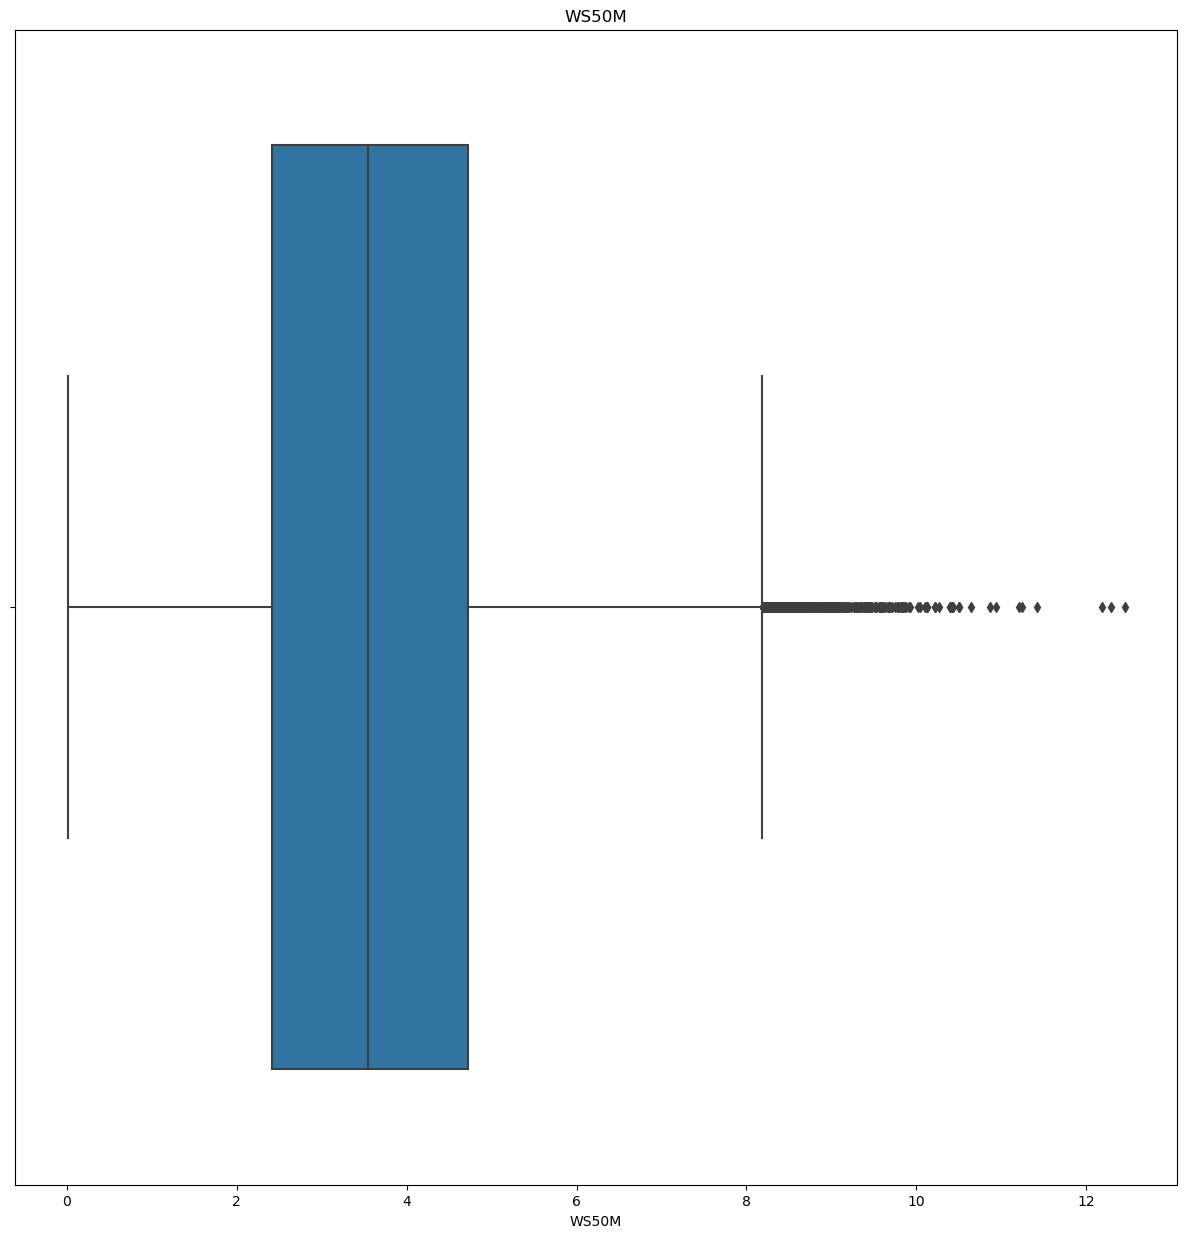

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[26.33 26.56 26.87 ... 35.45 35.71 35.75]
<class 'numpy.ndarray'>
[1.22 1.15 1.12 1.05 1.09 1.18 1.23 1.41 1.5  1.63 1.95 1.98 2.13 2.55
 3.02 3.31 3.22 2.76 2.82 3.23 3.7  3.96 3.88 3.65 3.15 2.58 2.49 2.78
 2.86 3.01 2.72 2.31 2.02 1.83 1.74 1.76 1.78 1.77 1.84 2.03 2.19 2.34
 2.28 2.26 2.05 1.65 1.52 1.34 1.66 1.85 1.99 1.96 1.88 1.71 1.58 1.54
 2.12 1.37 1.19 0.96 0.87 0.76 0.61 0.64 0.53 0.56 0.62 0.84 1.17 1.93
 1.94 1.75 1.39 1.33 1.2  1.14 1.1  0.89 0.77 0.67 0.68 0.79 1.02 1.87
 2.1  2.41 2.62 1.86 1.82 1.68 1.26 1.08 0.93 0.95 1.01 1.   0.99 1.28
 1.31 1.29 1.27 1.25 1.46 1.57 1.64 1.21 0.71 0.54 0.48 0.42 0.45 0.5
 0.51 0.4  0.27 0.22 0.14 0.32 0.73 0.52 0.37 0.26 0.2  0.18 0.23 0.3
 0.39 0.46 1.07 1.35 1.38 0.82 0.72 0.63 0.19 0.17 0.21 0.25 0.28 0.29
 0.31 0.34 0.58 0.6  0.74 0.78 0.81 0.8  0.65 0.41 0.35 0.36 0.47 0.1
 0.12 0.15 0.13 0.11 0.09 0.08 0.06 0.04 0.05 0.16 0.07 0.83 1.06 1.32
 1.45 0.91 0.88 1.11 1.13 1.04 0.92 0.75 0.7  0.33 0.43 0.57 0.69 1.8
 0.86 0.9  1.36

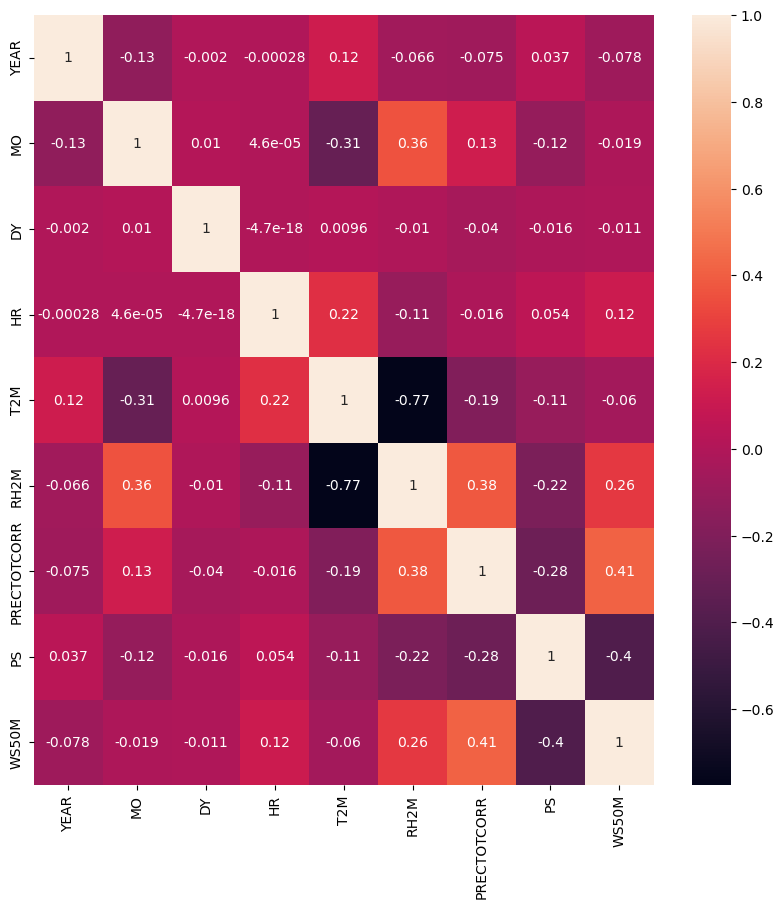

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


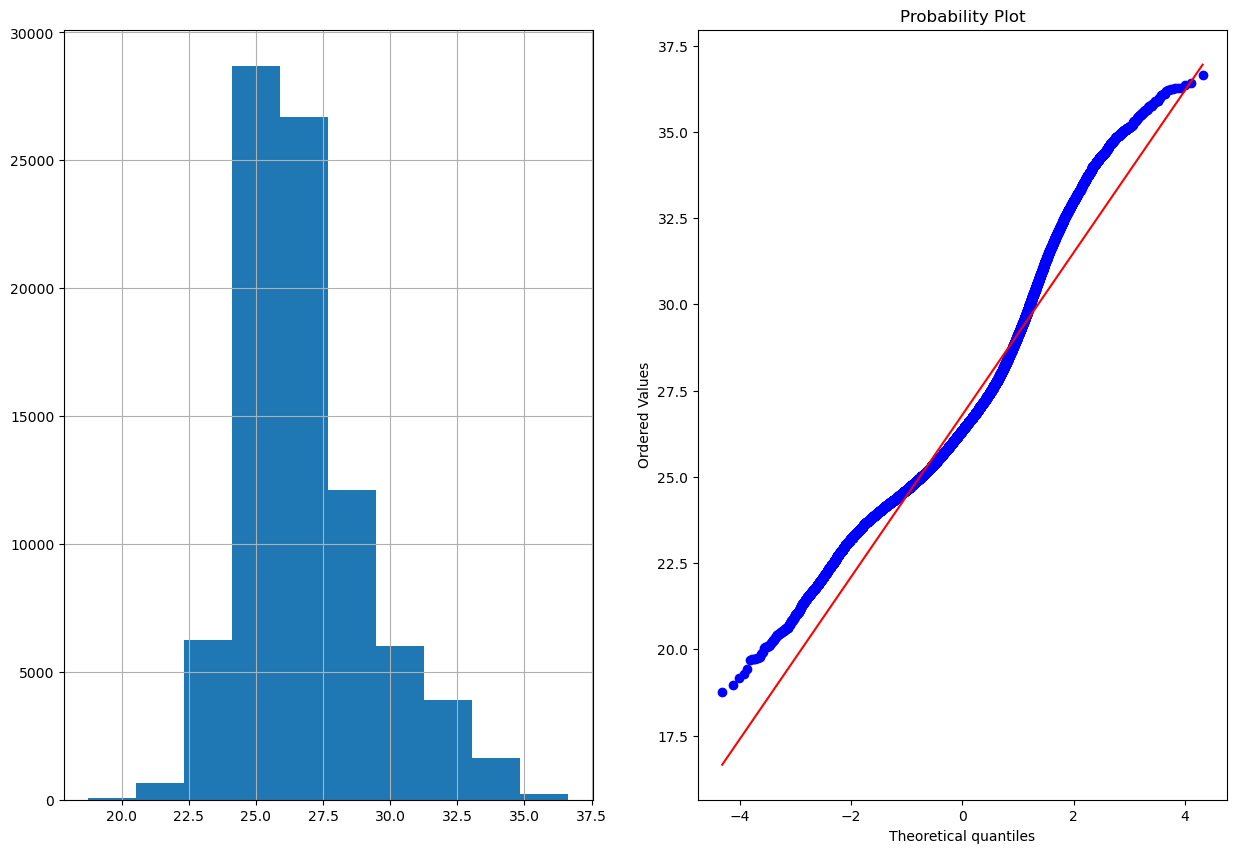

RH2M


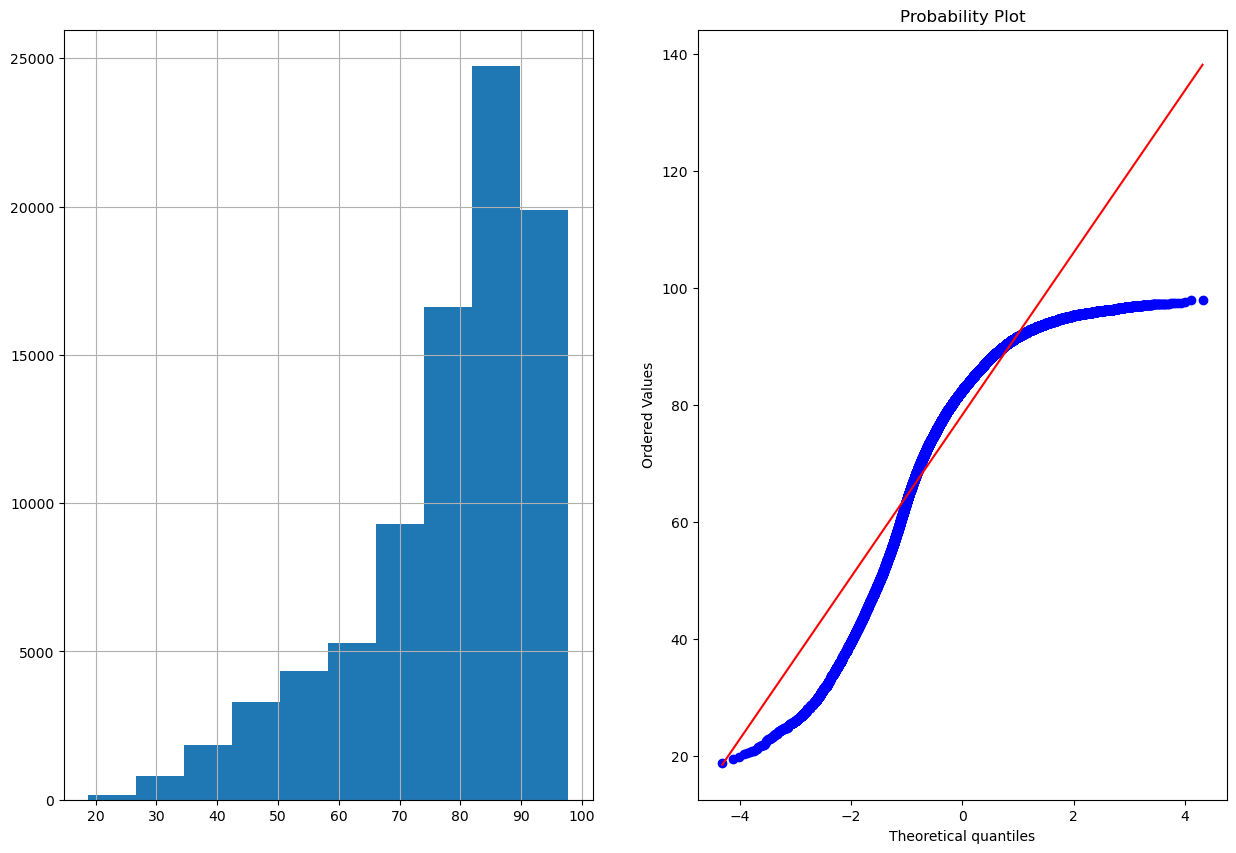

PRECTOTCORR


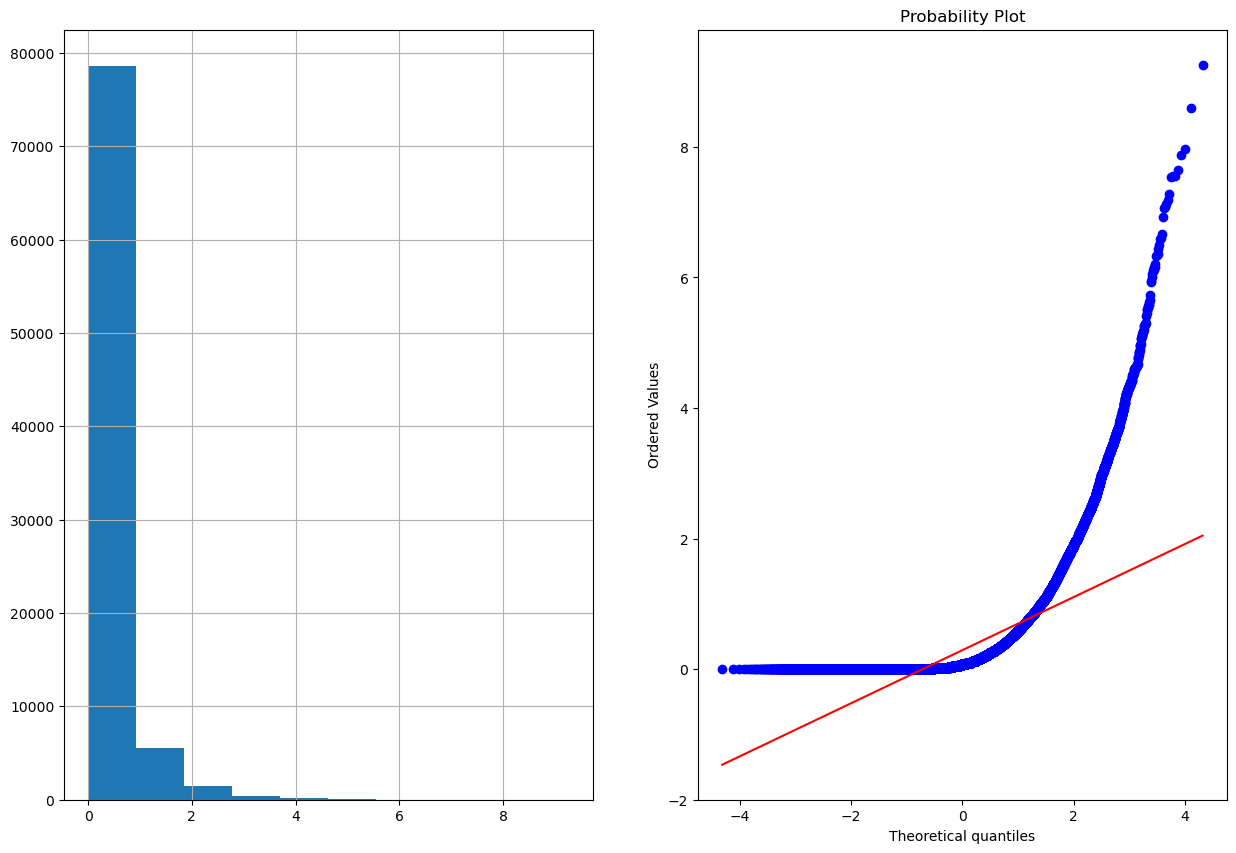

PS


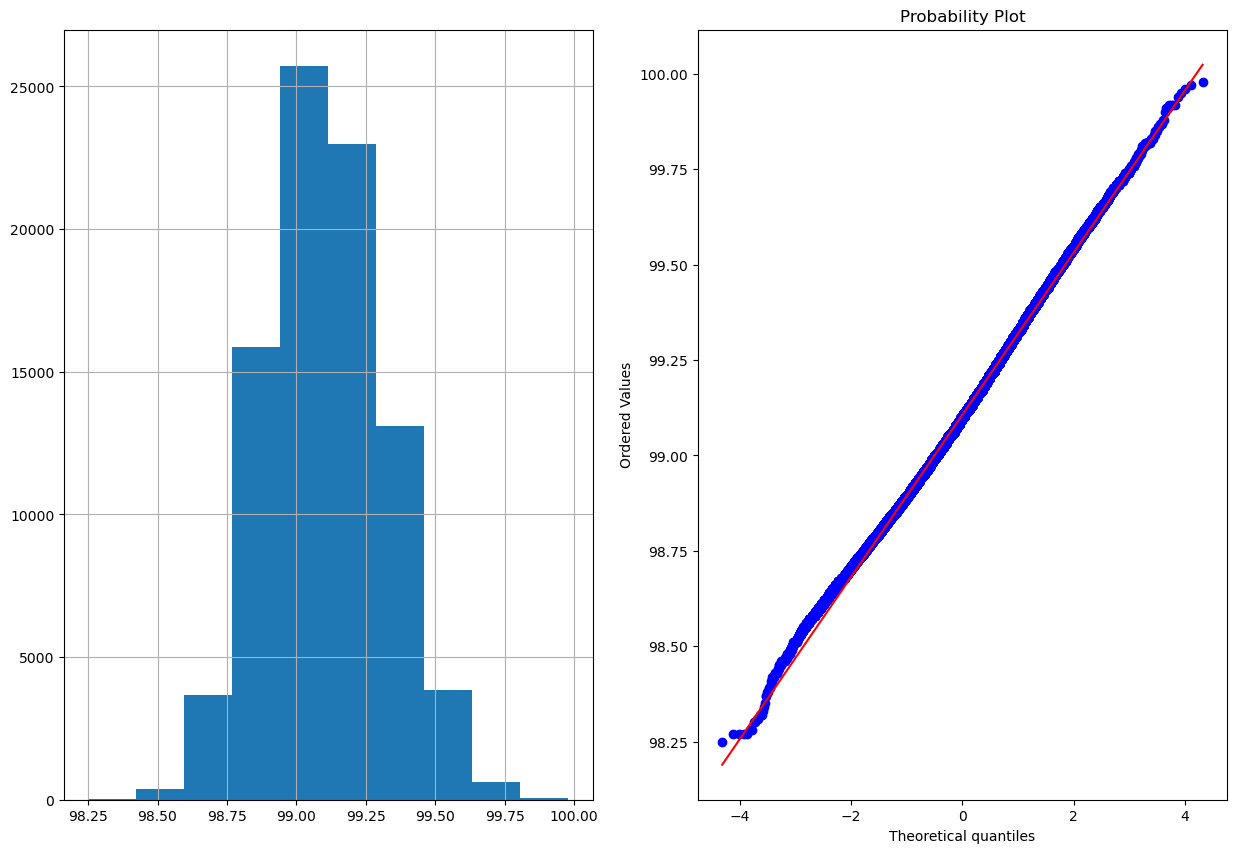

WS50M


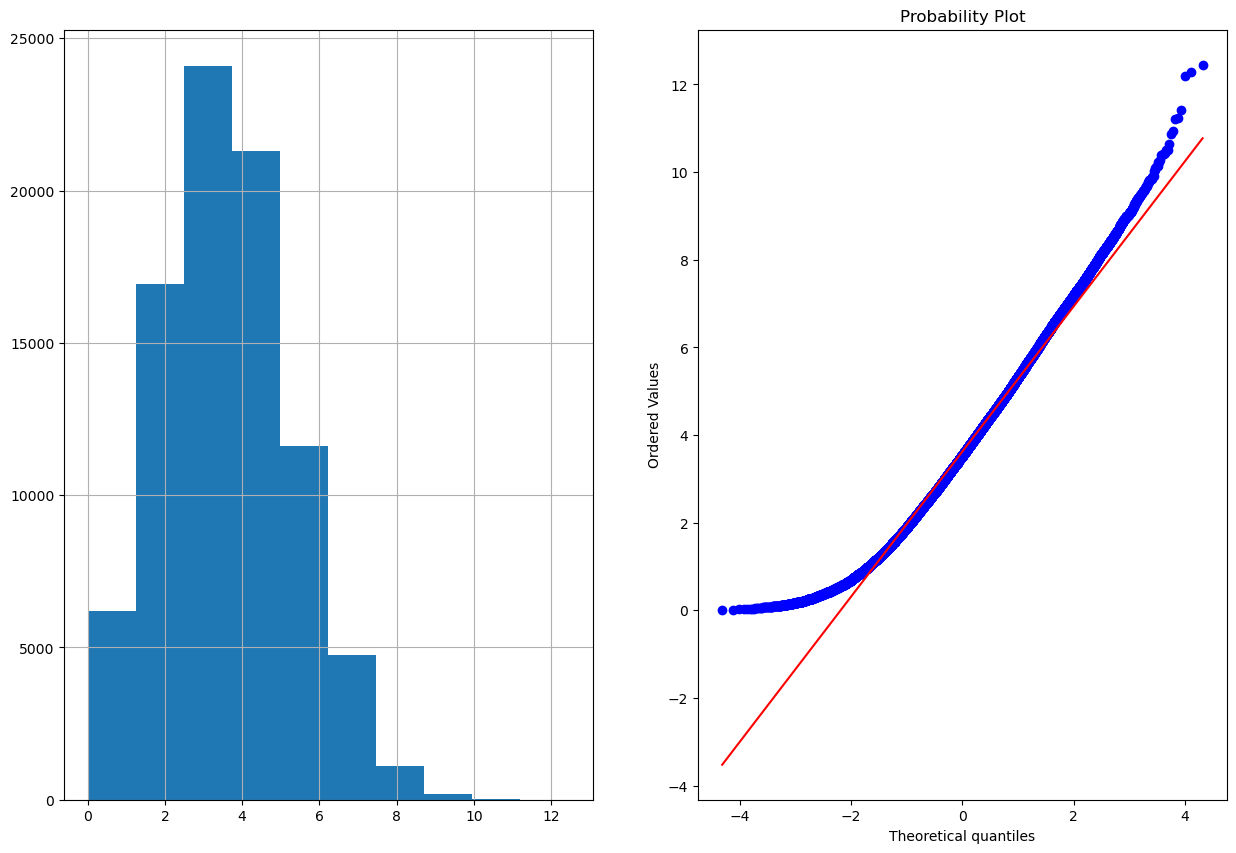

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([1.22, 1.15, 1.12, 1.05, 1.09, 1.18, 1.23, 1.41, 1.5 , 1.63, 1.95,
       1.98, 2.13, 2.55, 3.02, 3.31, 3.22, 2.76, 2.82, 3.23, 3.7 , 3.96,
       3.88, 3.65, 3.15, 2.58, 2.49, 2.78, 2.86, 3.01, 2.72, 2.31, 2.02,
       1.83, 1.74, 1.76, 1.78, 1.77, 1.84, 2.03, 2.19, 2.34, 2.28, 2.26,
       2.05, 1.65, 1.52, 1.34, 1.66, 1.85, 1.99, 1.96, 1.88, 1.71, 1.58,
       1.54, 2.12, 1.37, 1.19, 0.96, 0.87, 0.76, 0.61, 0.64, 0.53, 0.56,
       0.62, 0.84, 1.17, 1.93, 1.94, 1.75, 1.39, 1.33, 1.2 , 1.14, 1.1 ,
       0.89, 0.77, 0.67, 0.68, 0.79, 1.02, 1.87, 2.1 , 2.41, 2.62, 1.86,
       1.82, 1.68, 1.26, 1.08, 0.93, 0.95, 1.01, 1.  , 0.99, 1.28, 1.31,
       1.29, 1.27, 1.25, 1.46, 1.57, 1.64, 1.21, 0.71, 0.54, 0.48, 0.42,
       0.45, 0.5 , 0.51, 0.4 , 0.27, 0.22, 0.14, 0.32, 0.73, 0.52, 0.37,
       0.26, 0.2 , 0.18, 0.23, 0.3 , 0.39, 0.46, 1.07, 1.35, 1.38, 0.82,
       0.72, 0.63, 0.19, 0.17, 0.21, 0.25, 0.28, 0.29, 0.31, 0.34, 0.58,
       0.6 , 0.74, 0.78, 0.81, 0.8 , 0.65, 0.41, 0.

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([0., 1.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,26.33,0.0
1,26.56,0.0
2,26.87,0.0
3,27.13,0.0
4,27.30,0.0
...,...,...
86203,27.12,0.0
86204,27.01,0.0
86205,26.94,0.0
86206,26.81,0.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,26.33,0.0,5
1,26.56,0.0,6
2,26.87,0.0,7
3,27.13,0.0,8
4,27.30,0.0,9
...,...,...,...
86203,27.12,0.0,0
86204,27.01,0.0,1
86205,26.94,0.0,2
86206,26.81,0.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,26.33,0.0,5,1
1,26.56,0.0,6,1
2,26.87,0.0,7,1
3,27.13,0.0,8,1
4,27.30,0.0,9,1
...,...,...,...,...
86203,27.12,0.0,0,1
86204,27.01,0.0,1,1
86205,26.94,0.0,2,1
86206,26.81,0.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,26.33,0.0,5,1,6
1,26.56,0.0,6,1,6
2,26.87,0.0,7,1,6
3,27.13,0.0,8,1,6
4,27.30,0.0,9,1,6
...,...,...,...,...,...
86203,27.12,0.0,0,1,4
86204,27.01,0.0,1,1,4
86205,26.94,0.0,2,1,4
86206,26.81,0.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,26.33,0.0,5,1,6,2011
1,26.56,0.0,6,1,6,2011
2,26.87,0.0,7,1,6,2011
3,27.13,0.0,8,1,6,2011
4,27.30,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,27.12,0.0,0,1,4,2021
86204,27.01,0.0,1,1,4,2021
86205,26.94,0.0,2,1,4,2021
86206,26.81,0.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,26.33,0.0,5,1,6,2011
1,26.56,0.0,6,1,6,2011
2,26.87,0.0,7,1,6,2011
3,27.13,0.0,8,1,6,2011
4,27.30,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,27.12,0.0,0,1,4,2021
86204,27.01,0.0,1,1,4,2021
86205,26.94,0.0,2,1,4,2021
86206,26.81,0.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([0., 1.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,26.33,0.0,5,1,6,2011,93.31
1,26.56,0.0,6,1,6,2011,92.81
2,26.87,0.0,7,1,6,2011,91.88
3,27.13,0.0,8,1,6,2011,90.69
4,27.30,0.0,9,1,6,2011,87.56
...,...,...,...,...,...,...,...
86203,27.12,0.0,0,1,4,2021,88.69
86204,27.01,0.0,1,1,4,2021,88.69
86205,26.94,0.0,2,1,4,2021,88.44
86206,26.81,0.0,3,1,4,2021,88.44


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,26.33,0.0,5,1,6,2011,93.31,5.64
1,26.56,0.0,6,1,6,2011,92.81,6.04
2,26.87,0.0,7,1,6,2011,91.88,6.96
3,27.13,0.0,8,1,6,2011,90.69,8.18
4,27.30,0.0,9,1,6,2011,87.56,9.20
...,...,...,...,...,...,...,...,...
86203,27.12,0.0,0,1,4,2021,88.69,4.61
86204,27.01,0.0,1,1,4,2021,88.69,4.84
86205,26.94,0.0,2,1,4,2021,88.44,5.03
86206,26.81,0.0,3,1,4,2021,88.44,5.07


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,26.33,0.0,5,1,6,2011,93.31,5.64,5.64
1,26.56,0.0,6,1,6,2011,92.81,6.04,6.04
2,26.87,0.0,7,1,6,2011,91.88,6.96,6.96
3,27.13,0.0,8,1,6,2011,90.69,8.18,8.18
4,27.30,0.0,9,1,6,2011,87.56,9.20,9.20
...,...,...,...,...,...,...,...,...,...
86203,27.12,0.0,0,1,4,2021,88.69,4.61,4.61
86204,27.01,0.0,1,1,4,2021,88.69,4.84,4.84
86205,26.94,0.0,2,1,4,2021,88.44,5.03,5.03
86206,26.81,0.0,3,1,4,2021,88.44,5.07,5.07


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

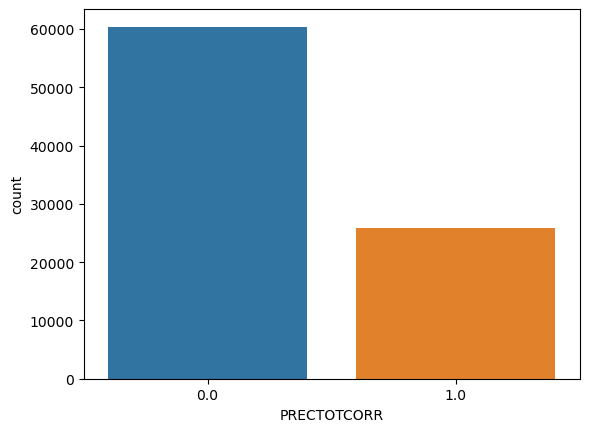

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("kozhikado-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,26.33,0.0,5,1,6,2011,93.31,5.64,5.64
1,26.56,0.0,6,1,6,2011,92.81,6.04,6.04
2,26.87,0.0,7,1,6,2011,91.88,6.96,6.96
3,27.13,0.0,8,1,6,2011,90.69,8.18,8.18
4,27.30,0.0,9,1,6,2011,87.56,9.20,9.20
...,...,...,...,...,...,...,...,...,...
86203,27.12,0.0,0,1,4,2021,88.69,4.61,4.61
86204,27.01,0.0,1,1,4,2021,88.69,4.84,4.84
86205,26.94,0.0,2,1,4,2021,88.44,5.03,5.03
86206,26.81,0.0,3,1,4,2021,88.44,5.07,5.07
